In [2]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from tqdm import tqdm_notebook as tqdm
from scout import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

In [3]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'
os.listdir(working_dir)

['example_roi_Adjacent.pdf',
 'ventricle_celltype_fractions_arlotta.pdf',
 'arlotta_with_FC.xlsx',
 'example_roi_TBR1-rich.pdf',
 'average_profile_TBR1-LowDN.pdf',
 'average_profile_TBR1-HighDN.pdf',
 'example_roi_Surface.pdf',
 'Lancaster_d60',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'average_profile_DN.pdf',
 'average_profile_TBR1-rich.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'ventricle_celltype_fractions_lancaster.pdf',
 'average_profile_Surface.pdf',
 'variance_ratio_histogram.pdf',
 'umap_arlotta_vs_lancaster.pdf',
 'example_roi_TBR1-HighDN.pdf',
 'cyto_profiles_combined_samples.npy',
 'example_roi_TBR1-LowDN.pdf',
 'clustermap_zika_hits.pdf',
 'cyto_arlotta_umap.pdf',
 'volcano_plot_arlotta..pdf',
 'clustermap_arlotta_hits.pdf',
 'cyto_labels_combined.npy',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx',
 'Arlotta_d56',
 'umap_arlotta_consistency.pdf',
 'model_arlotta.umap']

In [4]:
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
names = [t + '/' + p + '/' for t, p in zip(analysis['type'], analysis.index)]
names

['Arlotta_d56/20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40/',
 'Arlotta_d56/20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40/',
 'Arlotta_d56/20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40/',
 'Arlotta_d56/20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40/',
 'Arlotta_d56/20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40/',
 'Arlotta_d56/20190723_12_09_45_ef26_org6_488LP14_561LP140_642LP40/',
 'Lancaster_d60/20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_561LP140_642LP50/',
 'Lancaster_d60/20190531_14_31_36_AA_fatty2_488LP13_561LP140_642LP60/',
 'Lancaster_d60/20190531_15_00_56_AA_fatty3_488LP13_561LP120_642LP50/',
 'Lancaster_d60/20190531_15_57_33_AA_fatty1_488LP13_561LP100_642LP60/',
 'Lancaster_d60/20190531_17_03_00_AA_fatty4_488LP13_561LP100_642LP50/',
 'Lancaster_d60/20190531_17_54_24_AA_fatty5_488LP14_561LP100_642LP50/',
 'Lancaster_d60/20190531_18_54_48_AA_fatty6_488LP14_561LP100_642LP50/',
 'Lancaster_d60/20190531_20_32_55_AA_fatty7_488LP13_561LP140_642LP5

In [5]:
n_d60s = len(analysis.where(analysis['type'] == 'Lancaster_d60').dropna())
n_arlottas = len(analysis.where(analysis['type'] == 'Arlotta_d56').dropna())
new_names = [f'arlotta_{i+1}' for i in range(n_arlottas)] + [f'd60_{i+1}' for i in range(n_d60s)]
rename = dict(zip([n.split('/')[1] for n in names], new_names))
rename

{'20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40': 'arlotta_1',
 '20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40': 'arlotta_2',
 '20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40': 'arlotta_3',
 '20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40': 'arlotta_4',
 '20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40': 'arlotta_5',
 '20190723_12_09_45_ef26_org6_488LP14_561LP140_642LP40': 'arlotta_6',
 '20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_561LP140_642LP50': 'd60_1',
 '20190531_14_31_36_AA_fatty2_488LP13_561LP140_642LP60': 'd60_2',
 '20190531_15_00_56_AA_fatty3_488LP13_561LP120_642LP50': 'd60_3',
 '20190531_15_57_33_AA_fatty1_488LP13_561LP100_642LP60': 'd60_4',
 '20190531_17_03_00_AA_fatty4_488LP13_561LP100_642LP50': 'd60_5',
 '20190531_17_54_24_AA_fatty5_488LP14_561LP100_642LP50': 'd60_6',
 '20190531_18_54_48_AA_fatty6_488LP14_561LP100_642LP50': 'd60_7',
 '20190531_20_32_55_AA_fatty7_488LP13_561LP140_642LP50': 'd60_8'}

In [6]:
df = pd.read_excel(os.path.join(working_dir, 'combined_features.xlsx'), index_col=0)
# df = df.set_index('feature')
df = df.rename(columns=rename)
# df = df.drop(columns='arlotta_5')
df.head()

,arlotta_1,arlotta_2,arlotta_3,arlotta_4,arlotta_5,arlotta_6,d60_1,d60_2,d60_3,d60_4,d60_5,d60_6,d60_7,d60_8
dataset,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",1.0,2.0,3.0,0.0,1.0,0.0,23.0,5.0,15.0,13.0,14.0,25.0,22.0,9.0
"DN nbrhd, tbr1 count",1.0,0.0,0.0,0.0,1.0,0.0,14.0,2.0,7.0,12.0,10.0,12.0,3.0,2.0
"DN nbrhd, dn count",126227.0,69220.0,181582.0,85871.0,92211.0,61887.0,1254368.0,143520.0,646200.0,1873618.0,545173.0,1383294.0,1560760.0,521993.0
"SOX2 nbrhd, sox2 count",458064.0,812411.0,784557.0,544671.0,493890.0,505079.0,1063540.0,303410.0,543163.0,1169848.0,836021.0,969815.0,997507.0,718123.0
"SOX2 nbrhd, tbr1 count",153.0,564.0,249.0,182.0,182.0,256.0,750.0,517.0,250.0,395.0,418.0,455.0,550.0,330.0


In [7]:
# Drop any DP of Artifact related features
keep = np.asarray(['DP' not in f and 'Artifact' not in f for f in df.index])
df = df.iloc[keep]
len(df)

247

In [8]:
column_headers = list(df.keys())
ctrl_headers = [h for h in column_headers if 'd60' in h]
arlotta_headers = [h for h in column_headers if 'arlotta' in h]

df_ctrl = df[ctrl_headers]
df_arlotta = df[arlotta_headers]

df_ctrl.head()

,d60_1,d60_2,d60_3,d60_4,d60_5,d60_6,d60_7,d60_8
dataset,,,,,,,,
"DN nbrhd, sox2 count",23.0,5.0,15.0,13.0,14.0,25.0,22.0,9.0
"DN nbrhd, tbr1 count",14.0,2.0,7.0,12.0,10.0,12.0,3.0,2.0
"DN nbrhd, dn count",1254368.0,143520.0,646200.0,1873618.0,545173.0,1383294.0,1560760.0,521993.0
"SOX2 nbrhd, sox2 count",1063540.0,303410.0,543163.0,1169848.0,836021.0,969815.0,997507.0,718123.0
"SOX2 nbrhd, tbr1 count",750.0,517.0,250.0,395.0,418.0,455.0,550.0,330.0


Make volcano plots

In [9]:
ctrl_means = df_ctrl.mean(axis=1)
arlotta_means = df_arlotta.mean(axis=1)

fc = arlotta_means / ctrl_means
log2fc = np.log2(fc)

log2fc.head()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


dataset
DN nbrhd, sox2 count     -3.754888
DN nbrhd, tbr1 count     -4.539159
DN nbrhd, dn count       -3.268750
SOX2 nbrhd, sox2 count   -0.460276
SOX2 nbrhd, tbr1 count   -0.793383
dtype: float64

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


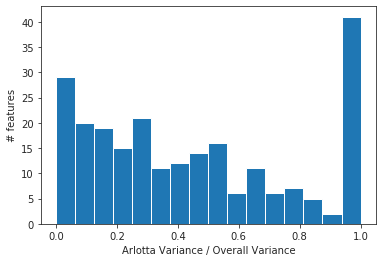

0.44998529967895085

In [10]:
variance_fraction = df_arlotta.std(axis=1)**2 / (df_ctrl.std(axis=1)**2 + df_arlotta.std(axis=1)**2)

plt.hist(variance_fraction, bins=16)
plt.xlabel('Arlotta Variance / Overall Variance')
plt.ylabel('# features')
plt.show()

variance_fraction.mean()

In [11]:
loc = np.where(variance_fraction > 0.98)[0]
drop_these = df.index[loc]
df2 = df.drop(drop_these)
df2_arlotta = df_arlotta.drop(drop_these)
df2_ctrl = df_ctrl.drop(drop_these)

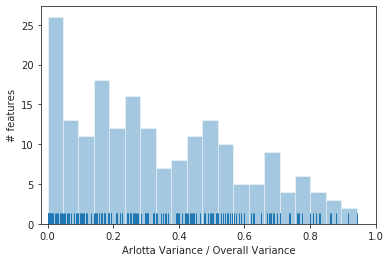

In [12]:
variance_fraction = df2_arlotta.std(axis=1)**2 / (df2_ctrl.std(axis=1)**2 + df_arlotta.std(axis=1)**2)
variance_fraction = variance_fraction[~np.isnan(variance_fraction)]

# # plt.hist(variance_fraction, bins=16)
sns.distplot(variance_fraction, bins=20, rug=True, kde_kws={'bw': 0.05}, kde=False)
plt.xlabel('Arlotta Variance / Overall Variance')
plt.ylabel('# features')
plt.xlim([-0.02, 1])
plt.show()

In [13]:
# df2_SE = pd.DataFrame({'arlotta': df2_arlotta.std(axis=1) / np.sqrt(df2_arlotta.shape[1]) / df2_arlotta.mean(axis=1),
#                        'ctrl': df2_ctrl.std(axis=1) / np.sqrt(df2_ctrl.shape[1]) / df2_ctrl.mean(axis=1)}).dropna()

df2_SE = pd.DataFrame({'arlotta': df2_arlotta.std(axis=1) / df2_arlotta.mean(axis=1),
                       'ctrl': df2_ctrl.std(axis=1) / df2_ctrl.mean(axis=1)})

df2_SE = pd.DataFrame({'arlotta': df2_arlotta.std(axis=1)**2,
                       'ctrl': df2_ctrl.std(axis=1)**2})

sort_idx = np.argsort(df2_SE['arlotta'])[::-1]

df2_SE_sort = df2_SE.iloc[sort_idx]
df2_SE_sort.head()

,arlotta,ctrl
dataset,,
"ave. TBR1-rich profile, dn profile stdev",2.706249e-03,7.645380e-03
"SOX2 nbrhd, sox2 count",2.453118e+10,8.422624e+10
"TBR1 nbrhd, tbr1 count",2.017501e+10,4.611242e+10
"ave. TBR1-rich profile, tbr1 profile stdev",1.147038e-02,2.316957e-02
"MidInter nbrhd, dn count",2.160944e+09,2.705786e+11


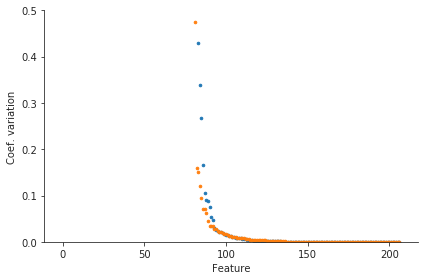

In [14]:
ax1 = sns.scatterplot(x=np.arange(len(df2_SE_sort)), 
                y=np.sort(df2_SE['arlotta'])[::-1],
                edgecolor=None,
                s=8)

ax2 = sns.scatterplot(x=np.arange(len(df2_SE_sort)), 
                y=np.sort(df2_SE['ctrl'])[::-1], 
                edgecolor=None,
                s=8)

# for k, h in enumerate(highlights):
#     i = np.where(np.asarray([f == h for f in df3_sort_filt['feature']]))[0][0]
#     y = df3_sort_filt['rel_stderr'].iloc[np.where(df3_sort_filt['feature'] == h)[0]]
#     ax.annotate(df3_sort_filt['feature'].iloc[i], xy=(i, y),  xycoords='data',
#                 xytext=(i/250+0.12, 1.2/(1+k/5)-0.25), textcoords='axes fraction',
#                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6, headlength=6),
#                 horizontalalignment='left', verticalalignment='top',
#                 )
plt.xlabel('Feature')
plt.ylabel('Coef. variation')
plt.yscale('linear')
plt.ylim([0, 0.5])
sns.despine()
plt.tight_layout()
# plt.savefig(os.path.join(working_dir, 'relative_stderr_plot.pdf'), bbox_inches='tight')
plt.show()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


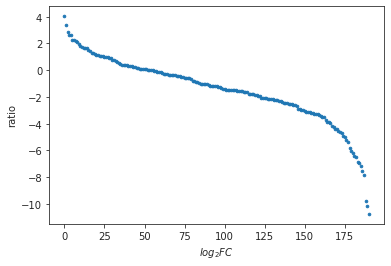

In [15]:
df2_SE['ratio'] = df2_SE['arlotta'] / df2_SE['ctrl']

df2_SE_sort = df2_SE.dropna().iloc[np.argsort(df2_SE['ratio'].dropna())[::-1]]


sns.scatterplot(x=np.arange(len(df2_SE_sort)), y=np.log2(df2_SE_sort['ratio']), edgecolor=None, s=8)
# sns.distplot(np.log2(df2_SE_sort['ratio']))
plt.xlabel('$log_2FC$')

plt.show()

In [17]:
%matplotlib inline

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


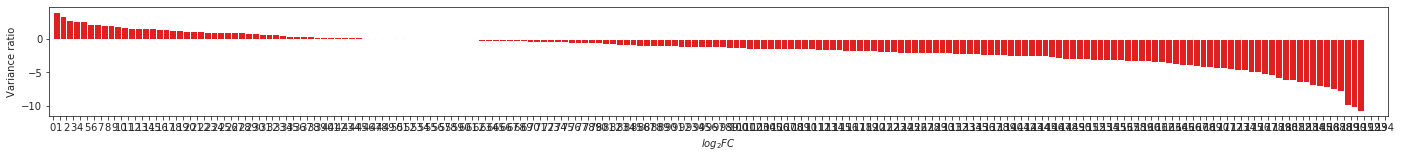

In [18]:
x = np.arange(len(df2_SE_sort))
y = np.log2(df2_SE_sort['ratio'])

idx_pos = np.where(y > 0)[0]
idx_neg = np.where(y <= 0)[0]

plt.figure(figsize=(24, 2))
ax = sns.barplot(x=x, y=y, color='r', edgecolor=None)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for i, bar in enumerate(ax.patches):
    bar.set_x(i)
    bar.set_width(1)

plt.xlabel('$log_2FC$')
plt.ylabel('Variance ratio')
# plt.savefig(os.path.join(working_dir, 'variance_ratio_histogram.pdf'), bbox_inches='tight')
plt.show()

In [20]:
len(np.where(y <= 0)[0]), len(y), len(np.where(y <= 0)[0]) / len(y)

(141, 195, 0.7230769230769231)

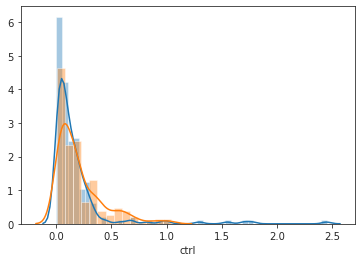

In [252]:
sns.distplot(df2_SE['arlotta'].dropna())
sns.distplot(df2_SE['ctrl'].dropna())
# plt.xlabel('$log_2FC$')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

IndexError: index out of bounds

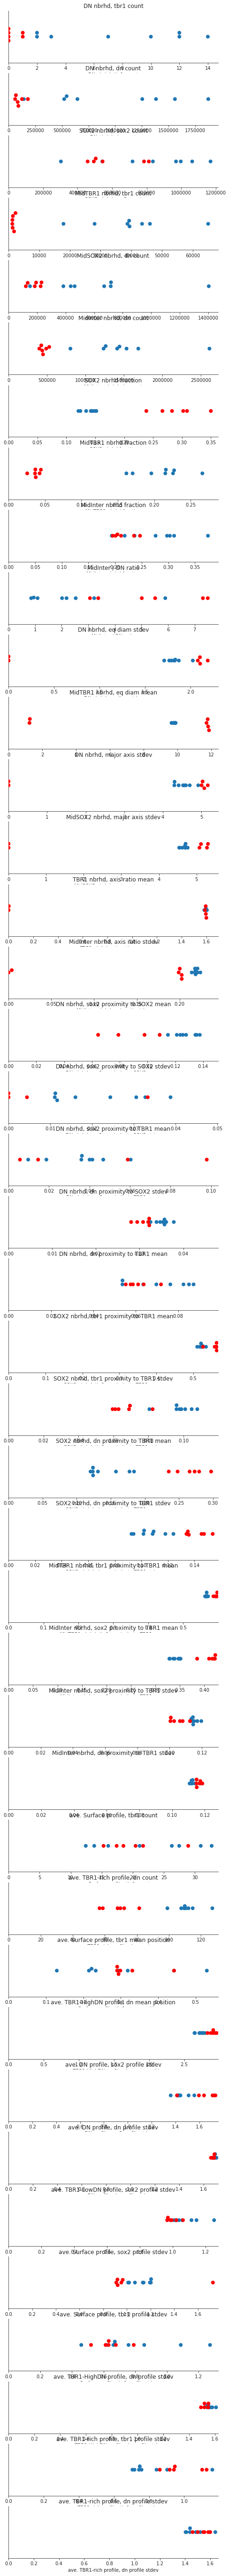

In [124]:
nb_plots = len(np.where(variance_fraction < 0.1)[0])

k = 1
fig = plt.figure(figsize=(8, 100))
for i, feature in tqdm(enumerate(df_ctrl.index), total=len(df_ctrl)):
    if variance_fraction[i] < 0.1:
        a = df_ctrl.loc[feature]
        b = df_arlotta.loc[feature]
        
        plt.subplot(nb_plots, 1, k)
        
        ax = sns.swarmplot(x=a, s=8, figure=fig)
        ax1 = sns.swarmplot(x=b, s=8, figure=fig, color='r')
        plt.legend().remove()
        xlim = ax.get_xlim()
        ax.get_yaxis().set_visible(False)
        plt.xlim([0, xlim[1]])
        plt.title(feature)
        sns.despine()
        k += 1
fig.tight_layout()
plt.show()

In [192]:
ts = []
pvals = []

for feature in tqdm(df_ctrl.index, total=len(df_ctrl)):
    a = df_ctrl.loc[feature]
    b = df_arlotta.loc[feature]
    t, pval = ttest_ind(a, b)
    ts.append(t)
    pvals.append(pval)
t = np.asarray(ts)
pval = np.asarray(pvals)

logp = -np.log10(pval)

29


/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


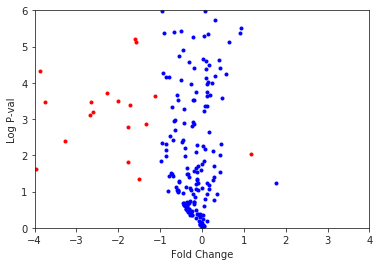

In [193]:
idx_fc = np.where(np.abs(log2fc) > 1)[0]
idx_pval = np.where(pval < 0.05)[0]

idx_keep = np.intersect1d(idx_fc, idx_pval)
idx_drop = np.setdiff1d(np.arange(len(pval)), idx_keep)

print(len(idx_keep))

plt.plot(log2fc[idx_drop], logp[idx_drop], 'b.')
plt.plot(log2fc[idx_keep], logp[idx_keep], 'r.')
plt.xlabel('Fold Change')
plt.ylabel('Log P-val')
plt.xlim([-4, 4])
plt.ylim([0, 6])
plt.show()

In [194]:
for i, f in enumerate(df_ctrl.index):
    print(i, f)

# Look at features
# 157 - Start of Cyto
# 217 - Start of Whole Org

0 DN nbrhd, sox2 count
1 DN nbrhd, tbr1 count
2 DN nbrhd, dn count
3 SOX2 nbrhd, sox2 count
4 SOX2 nbrhd, tbr1 count
5 SOX2 nbrhd, dn count
6 TBR1 nbrhd, sox2 count
7 TBR1 nbrhd, tbr1 count
8 TBR1 nbrhd, dn count
9 MidTBR1 nbrhd, sox2 count
10 MidTBR1 nbrhd, tbr1 count
11 MidTBR1 nbrhd, dn count
12 MidSOX2 nbrhd, sox2 count
13 MidSOX2 nbrhd, tbr1 count
14 MidSOX2 nbrhd, dn count
15 MidInter nbrhd, sox2 count
16 MidInter nbrhd, tbr1 count
17 MidInter nbrhd, dn count
18 DN nbrhd fraction
19 SOX2 nbrhd fraction
20 TBR1 nbrhd fraction
21 MidTBR1 nbrhd fraction
22 MidSOX2 nbrhd fraction
23 MidInter nbrhd fraction
24 TBR1 / SOX2 ratio
25 MidTBR1 / MidSOX2 ratio
26 MidInter / DN ratio
27 DN nbrhd, eq diam mean
28 DN nbrhd, eq diam stdev
29 SOX2 nbrhd, eq diam mean
30 SOX2 nbrhd, eq diam stdev
31 TBR1 nbrhd, eq diam mean
32 TBR1 nbrhd, eq diam stdev
33 MidTBR1 nbrhd, eq diam mean
34 MidTBR1 nbrhd, eq diam stdev
35 MidSOX2 nbrhd, eq diam mean
36 MidSOX2 nbrhd, eq diam stdev
37 MidInter nbrhd, e

In [197]:
cyto_start = 135
wholeorg_start = 195

singlecell_idx = np.arange(cyto_start)
cyto_idx = np.arange(cyto_start, wholeorg_start)
wholeorg_idx = np.arange(wholeorg_start, len(df_ctrl.index))

len(log2fc), wholeorg_idx[-1]

(247, 246)

0 SOX2 nbrhd fraction SOX2 nbrhd fraction
1 TBR1 nbrhd fraction TBR1 nbrhd fraction
2 TBR1-rich cytoarchitecture fraction TBR1-rich cytoarchitecture fraction
3 DN nbrhd, dn count DN nbrhd, dn count
4 MidTBR1 nbrhd fraction MidTBR1 nbrhd fraction


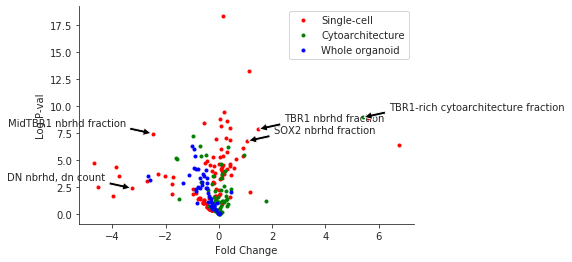

In [219]:
hits_show = [
    # Up
    'SOX2 nbrhd fraction',
    'TBR1 nbrhd fraction',
    'TBR1-rich cytoarchitecture fraction',
    # Down
    'DN nbrhd, dn count',
#     'MidTBR1 nbrhd, dn count',
#     'MidInter nbrhd, dn count',
    'MidTBR1 nbrhd fraction',
#     'DN cytoarchitecture fraction',
#     'TBR1-HighDN cytoarchitecture fraction',
#     'organoid volume (mm3)',
#     'ventricle volume mean (um3)',
#     'ventricle volume stdev (um3)',
#     'DN nbrhd, dn surface distance mean (um)',
]

sns.set_style('ticks')

fig, ax = plt.subplots()

plt.plot(log2fc[singlecell_idx], logp[singlecell_idx], 'r.', label='Single-cell')
plt.plot(log2fc[cyto_idx], logp[cyto_idx], 'g.', label='Cytoarchitecture')
plt.plot(log2fc[wholeorg_idx], logp[wholeorg_idx], 'b.', label='Whole organoid')
# plt.plot([0, 0], [0, 7], 'k-')
plt.xlabel('Fold Change')
plt.ylabel('Log P-val')
plt.legend()

for k, h in enumerate(hits_show):
    i = np.where(np.asarray([f == h for f in df.index]))[0][0]
    x = log2fc[i]
    y = logp[i]
    if x < 0:
        xytext = (x-1, y+1)
        halign = 'right'
    else:
        xytext = (x+1, y+1)
        halign = 'left'
    print(k,h,  df.index[i])
    ax.annotate(h, xy=(x, y),  xycoords='data',
                xytext=xytext, textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=8, headlength=8),
                horizontalalignment=halign, verticalalignment='center',
                )

# plt.xlim([-4, 4])
# plt.ylim([0, 6])
sns.despine()

plt.savefig(os.path.join(working_dir, 'volcano_plot_arlotta..pdf'), bbox_inches='tight')

plt.show()

Save dataframe with t-test results

In [220]:
# This will modify df

feature_scale = cyto_start * ['Single-cell'] + (wholeorg_start - cyto_start) * ['Cytoarchitecture'] + (len(df) - wholeorg_start) * ['Whole organoid']
df['scale'] = feature_scale

df['FC'] = fc
df['t'] = t
df['pval'] = pval
df['log2FC'] = log2fc
df['logp'] = logp

df.head()

,arlotta_1,arlotta_2,arlotta_3,arlotta_4,arlotta_5,arlotta_6,d60_1,d60_2,d60_3,d60_4,d60_5,d60_6,d60_7,d60_8,scale,FC,t,pval,log2FC,logp
dataset,,,,,,,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",1.0,2.0,3.0,0.0,1.0,0.0,23.0,5.0,15.0,13.0,14.0,25.0,22.0,9.0,Single-cell,0.074074,4.955367,0.000333,-3.754888,3.477087
"DN nbrhd, tbr1 count",1.0,0.0,0.0,0.0,1.0,0.0,14.0,2.0,7.0,12.0,10.0,12.0,3.0,2.0,Single-cell,0.043011,3.639734,0.003390,-4.539159,2.469838
"DN nbrhd, dn count",126227.0,69220.0,181582.0,85871.0,92211.0,61887.0,1254368.0,143520.0,646200.0,1873618.0,545173.0,1383294.0,1560760.0,521993.0,Single-cell,0.103755,3.538531,0.004082,-3.268750,2.389143
"SOX2 nbrhd, sox2 count",458064.0,812411.0,784557.0,544671.0,493890.0,505079.0,1063540.0,303410.0,543163.0,1169848.0,836021.0,969815.0,997507.0,718123.0,Single-cell,0.726847,1.713119,0.112383,-0.460276,0.949300
"SOX2 nbrhd, tbr1 count",153.0,564.0,249.0,182.0,182.0,256.0,750.0,517.0,250.0,395.0,418.0,455.0,550.0,330.0,Single-cell,0.576990,2.355460,0.036350,-0.793383,1.439494


In [204]:
df.to_excel(os.path.join(working_dir, 'arlotta_with_FC.xlsx'))

Make swarm plots

In [221]:
kept_feats = df_ctrl.index[idx_keep]
for f, a, b in zip(kept_feats, ctrl_means[idx_keep], arlotta_means[idx_keep]):
    if b > a:
        direction = 1
    else:
        direction = -1
    print(f'{f:60s} {a:12.3f} -> {b:12.3f} {direction:4d}')

DN nbrhd, sox2 count                                               15.750 ->        1.167   -1
DN nbrhd, tbr1 count                                                7.750 ->        0.333   -1
DN nbrhd, dn count                                             991115.750 ->   102833.000   -1
SOX2 nbrhd, dn count                                              584.750 ->    63346.333    1
TBR1 nbrhd, dn count                                             1553.000 ->    75831.667    1
MidTBR1 nbrhd, sox2 count                                           2.625 ->        0.167   -1
MidTBR1 nbrhd, tbr1 count                                       39762.125 ->     1549.833   -1
MidTBR1 nbrhd, dn count                                       1184473.750 ->    81421.167   -1
MidSOX2 nbrhd, sox2 count                                       13930.375 ->     2167.833   -1
MidSOX2 nbrhd, tbr1 count                                           4.875 ->        0.000   -1
MidSOX2 nbrhd, dn count                           

In [222]:
ctrl_hits = df_ctrl.loc[kept_feats].T
arlotta_hits = df_arlotta.loc[kept_feats].T

In [223]:
ctrl_hits['type'] = 'ctrl'
arlotta_hits['type'] = 'arlotta'

df_hits = ctrl_hits.append(arlotta_hits)
df_hits['analysis'] = 'organoids'

df_hits

dataset,"DN nbrhd, sox2 count","DN nbrhd, tbr1 count","DN nbrhd, dn count","SOX2 nbrhd, dn count","TBR1 nbrhd, dn count","MidTBR1 nbrhd, sox2 count","MidTBR1 nbrhd, tbr1 count","MidTBR1 nbrhd, dn count","MidSOX2 nbrhd, sox2 count","MidSOX2 nbrhd, tbr1 count",...,Surface cytoarchitecture fraction,TBR1-HighDN cytoarchitecture fraction,TBR1-rich cytoarchitecture fraction,organoid volume (mm3),ventricle volume mean (um3),ventricle volume stdev (um3),"DN nbrhd, dn surface distance mean (um)","MidSOX2 nbrhd, dn surface distance mean (um)",type,analysis
d60_1,23.0,14.0,1254368.0,858.0,2239.0,7.0,65051.0,1937382.0,19757.0,8.0,...,0.047345,0.240786,0.004318,16.716117,7.243647e+05,2.609347e+06,271.155202,287.393497,ctrl,organoids
d60_2,5.0,2.0,143520.0,174.0,687.0,0.0,17903.0,492833.0,6851.0,4.0,...,0.122242,0.196714,0.004123,4.297959,1.284974e+06,4.488954e+06,144.155684,231.080199,ctrl,organoids
d60_3,15.0,7.0,646200.0,393.0,1265.0,2.0,38749.0,819066.0,9461.0,4.0,...,0.057375,0.179818,0.001440,8.602549,2.872835e+06,4.138098e+06,194.273301,325.060469,ctrl,organoids
d60_4,13.0,12.0,1873618.0,1015.0,2128.0,1.0,39309.0,1361486.0,25559.0,5.0,...,0.037009,0.274722,0.003441,12.707541,1.072268e+06,2.983994e+06,272.527695,303.667972,ctrl,organoids
d60_5,14.0,10.0,545173.0,472.0,1462.0,1.0,43511.0,1205052.0,14083.0,4.0,...,0.059520,0.183848,0.000903,11.177175,1.128635e+06,3.275787e+06,278.057279,320.780082,ctrl,organoids
d60_6,25.0,12.0,1383294.0,509.0,1727.0,4.0,28044.0,1006302.0,16513.0,12.0,...,0.012075,0.159302,0.014618,11.880659,2.046197e+06,7.957753e+06,225.547642,308.084387,ctrl,organoids
d60_7,22.0,3.0,1560760.0,706.0,1726.0,4.0,46083.0,1421426.0,10658.0,2.0,...,0.025250,0.164656,0.009669,11.793224,1.450258e+06,3.958382e+06,262.143569,325.094668,ctrl,organoids
d60_8,9.0,2.0,521993.0,551.0,1190.0,2.0,39447.0,1232243.0,8561.0,0.0,...,0.036274,0.229704,0.000786,7.764683,1.613532e+06,3.370078e+06,187.323893,304.755707,ctrl,organoids
arlotta_1,1.0,1.0,126227.0,38718.0,65776.0,0.0,1421.0,87540.0,2310.0,0.0,...,0.008944,0.099541,0.237462,3.890611,2.877282e+05,7.022862e+05,117.827890,161.596254,arlotta,organoids
arlotta_2,2.0,0.0,69220.0,91947.0,85640.0,0.0,1331.0,64941.0,2861.0,0.0,...,0.021820,0.051273,0.194780,4.700602,2.079291e+05,5.148890e+05,98.559354,142.196543,arlotta,organoids


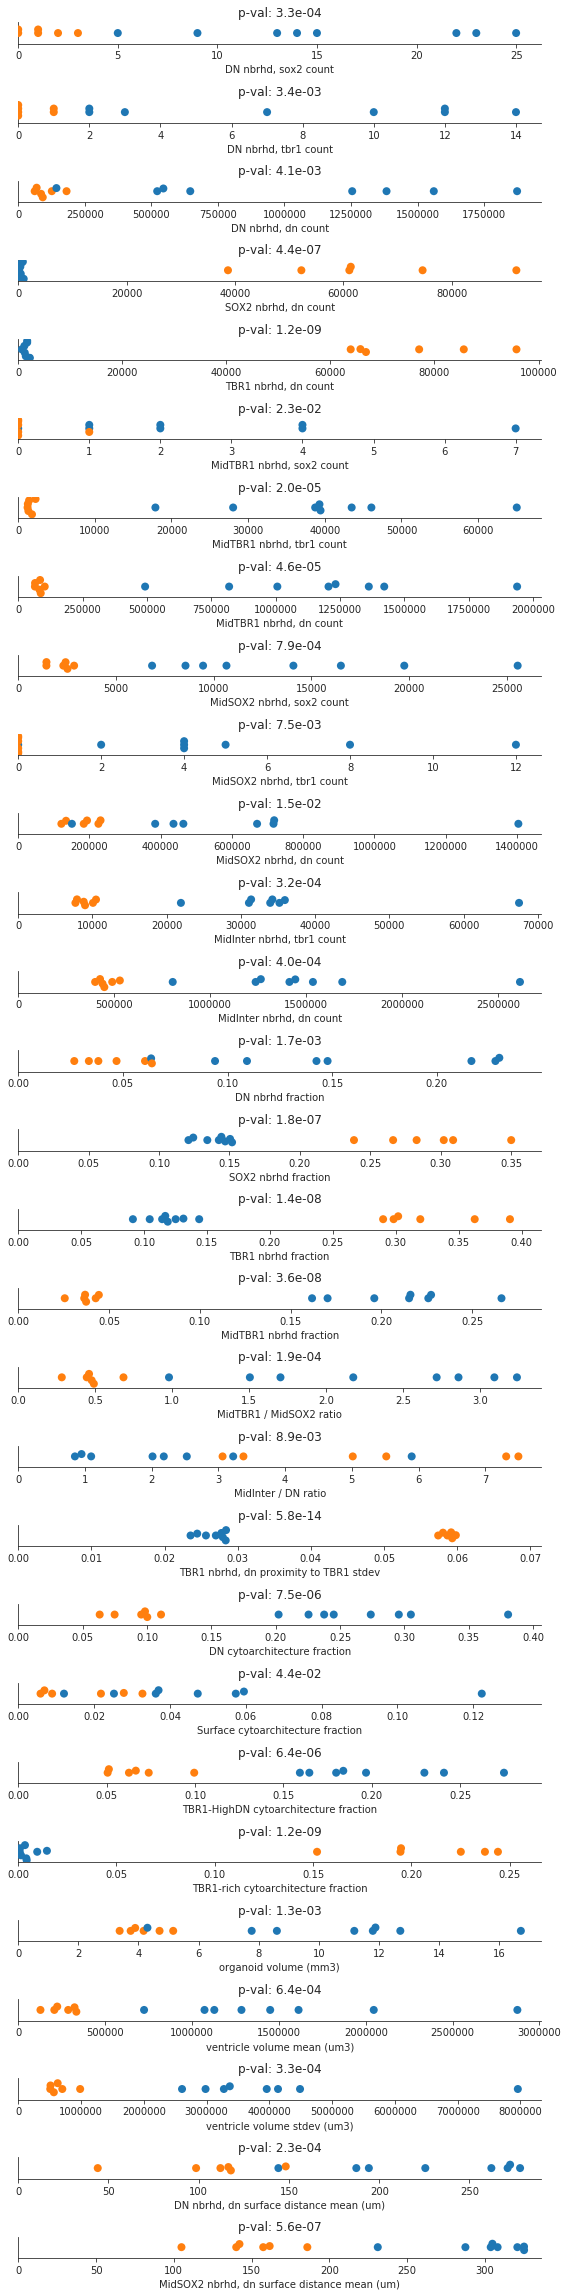

In [132]:
fig = plt.figure(figsize=(8, 32))

for i, f in enumerate(kept_feats):
    plt.subplot(len(kept_feats), 1, i+1)
    plt.title('p-val: {:.1e}'.format(df['pval'][f]))
    ax = sns.swarmplot(x=f, y='analysis', hue='type', data=df_hits, s=8, figure=fig)
    plt.legend().remove()
    xlim = ax.get_xlim()
    ax.get_yaxis().set_visible(False)
    plt.xlim([0, xlim[1]])
    sns.despine()

fig.tight_layout()
plt.show()

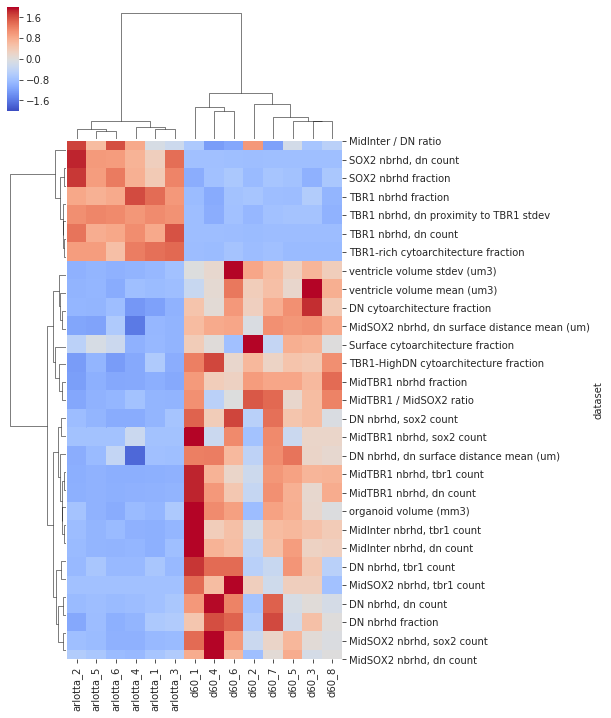

In [225]:
sns.clustermap(data=df_hits.drop(columns=['type', 'analysis']).T,
               method='ward', 
               z_score=0, 
               cmap='coolwarm', 
               vmin=-2,
               vmax=2,
               figsize=(6, 12))
plt.savefig(os.path.join(working_dir, 'clustermap_arlotta_hits.pdf'), bbox_inches='tight')
plt.show()

Radar plots

Cytoarchitecutre proportions

In [658]:
[print(f) for f in df.index]

niche DN, celltype sox2, count
niche DN, celltype tbr1, count
niche DN, celltype dn, count
niche SOX2, celltype sox2, count
niche SOX2, celltype tbr1, count
niche SOX2, celltype dn, count
niche TBR1, celltype sox2, count
niche TBR1, celltype tbr1, count
niche TBR1, celltype dn, count
niche DP, celltype sox2, count
niche DP, celltype tbr1, count
niche DP, celltype dn, count
niche Intermediate, celltype sox2, count
niche Intermediate, celltype tbr1, count
niche Intermediate, celltype dn, count
niche DN, eq diam mean
niche DN, eq diam stdev
niche SOX2, eq diam mean
niche SOX2, eq diam stdev
niche TBR1, eq diam mean
niche TBR1, eq diam stdev
niche DP, eq diam mean
niche DP, eq diam stdev
niche Intermediate, eq diam mean
niche Intermediate, eq diam stdev
niche DN, major axis mean
niche DN, major axis stdev
niche SOX2, major axis mean
niche SOX2, major axis stdev
niche TBR1, major axis mean
niche TBR1, major axis stdev
niche DP, major axis mean
niche DP, major axis stdev
niche Intermediate, 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [133]:
cyto_names = ['Adjacent',
                 'DN',
                 'TBR1-LowDN',
                 'Surface',
                 'TBR1-HighDN',
                 'TBR1-rich']
cyto_features = [f'{n} cytoarchitecture fraction' for n in cyto_names]

ctrl_cyto = df_ctrl.loc[cyto_features].mean(axis=1)
arlotta_cyto = df_arlotta.loc[cyto_features].mean(axis=1)

df_cyto = pd.DataFrame({'ctrl': ctrl_cyto,
                        'arlotta': arlotta_cyto})
df_cyto

,ctrl,arlotta
dataset,,
Adjacent cytoarchitecture fraction,0.224985,0.430083
DN cytoarchitecture fraction,0.270697,0.090568
TBR1-LowDN cytoarchitecture fraction,0.246076,0.186583
Surface cytoarchitecture fraction,0.049636,0.017363
TBR1-HighDN cytoarchitecture fraction,0.203694,0.067393
TBR1-rich cytoarchitecture fraction,0.004912,0.208010


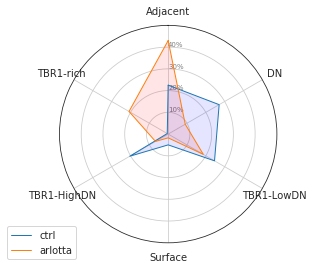

In [134]:
# number of variable
categories=list(cyto_names)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.10, 0.20, 0.30, 0.40], ["10%", "20%", "30%", "40%"], color="grey", size=7)
plt.ylim(0, 0.5)

# Ind1
values = list(df_cyto['ctrl'].values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="ctrl")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = list(df_cyto['arlotta'].values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="arlotta")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

Feature heatmap / clustermap

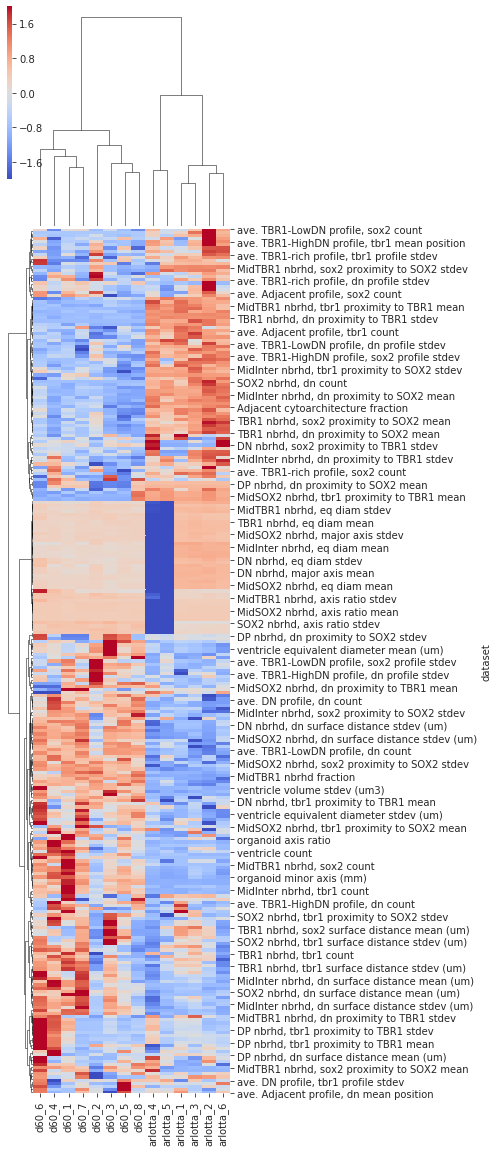

In [102]:
# need to not have FC and logP in it
df_imputed = df.fillna(method='backfill')

sns.clustermap(data=df_imputed, 
               method='ward', 
               z_score=0, 
               cmap='coolwarm', 
               vmin=-2,
               vmax=2,
               figsize=(4, 20))
plt.show()

# Feature correlations

In [135]:
from itertools import product
from scipy.stats import pearsonr

In [104]:
features = list(df_ctrl.index)
combinations = list(product(features, features))

len(combinations), len(features) ** 2

(75625, 75625)

In [99]:
corr = []
R = np.zeros((len(features), len(features)))
P = np.zeros((len(features), len(features)))
for combination in tqdm(combinations, total=len(combinations)):
    feat1 = combination[0]
    feat2 = combination[1]
    i = features.index(feat1)
    j = features.index(feat2)
    a = df_imputed.loc[feat1]
    b = df_imputed.loc[feat2]
    # remove nans
    keep = np.logical_and(~np.isnan(a), ~np.isnan(b))
    a = a[keep]
    b = b[keep]
    r, p = pearsonr(a, b)
#     if np.isclose(r, 1.0):
#         print(feat1 == feat2)
    corr.append(r)
    R[i, j] = r
    P[i, j] = p
corr = np.asarray(corr)

In [31]:
df_r = pd.DataFrame(R, index=features, columns=features)
df_r.head()

,"DN nbrhd, sox2 count","DN nbrhd, tbr1 count","DN nbrhd, dn count","SOX2 nbrhd, sox2 count","SOX2 nbrhd, tbr1 count","SOX2 nbrhd, dn count","TBR1 nbrhd, sox2 count","TBR1 nbrhd, tbr1 count","TBR1 nbrhd, dn count","DP nbrhd, sox2 count",...,"MidSOX2 nbrhd, tbr1 surface distance mean (um)","MidSOX2 nbrhd, tbr1 surface distance stdev (um)","MidSOX2 nbrhd, dn surface distance mean (um)","MidSOX2 nbrhd, dn surface distance stdev (um)","MidInter nbrhd, sox2 surface distance mean (um)","MidInter nbrhd, sox2 surface distance stdev (um)","MidInter nbrhd, tbr1 surface distance mean (um)","MidInter nbrhd, tbr1 surface distance stdev (um)","MidInter nbrhd, dn surface distance mean (um)","MidInter nbrhd, dn surface distance stdev (um)"
"DN nbrhd, sox2 count",1.000000,0.727198,0.376558,-0.469202,-0.435683,-0.516516,0.010113,-0.565201,-0.562481,-0.131314,...,0.652801,0.556457,0.137348,0.193778,-0.031196,-0.144690,-0.062948,-0.038322,0.096431,-0.093308
"DN nbrhd, tbr1 count",0.727198,1.000000,0.539584,-0.473635,-0.537121,-0.427215,-0.314742,-0.668509,-0.584100,-0.336167,...,0.662307,0.380175,0.009855,-0.148188,-0.174812,-0.272638,-0.274948,-0.226718,-0.039010,-0.273618
"DN nbrhd, dn count",0.376558,0.539584,1.000000,-0.350975,-0.472919,-0.120047,0.097713,-0.452505,-0.419280,-0.110794,...,0.021530,0.269568,0.372702,0.354302,0.361705,0.457593,0.360410,0.469789,0.293999,0.268123
"SOX2 nbrhd, sox2 count",-0.469202,-0.473635,-0.350975,1.000000,0.946871,0.760340,0.428871,0.877999,0.461873,0.689060,...,-0.312588,0.248545,-0.581664,-0.169232,0.179970,0.208339,0.214091,0.074234,-0.039900,0.087191
"SOX2 nbrhd, tbr1 count",-0.435683,-0.537121,-0.472919,0.946871,1.000000,0.602335,0.546618,0.852533,0.385422,0.748799,...,-0.277400,0.250234,-0.575461,-0.103263,0.172608,0.262427,0.209089,0.161797,-0.053237,0.129655


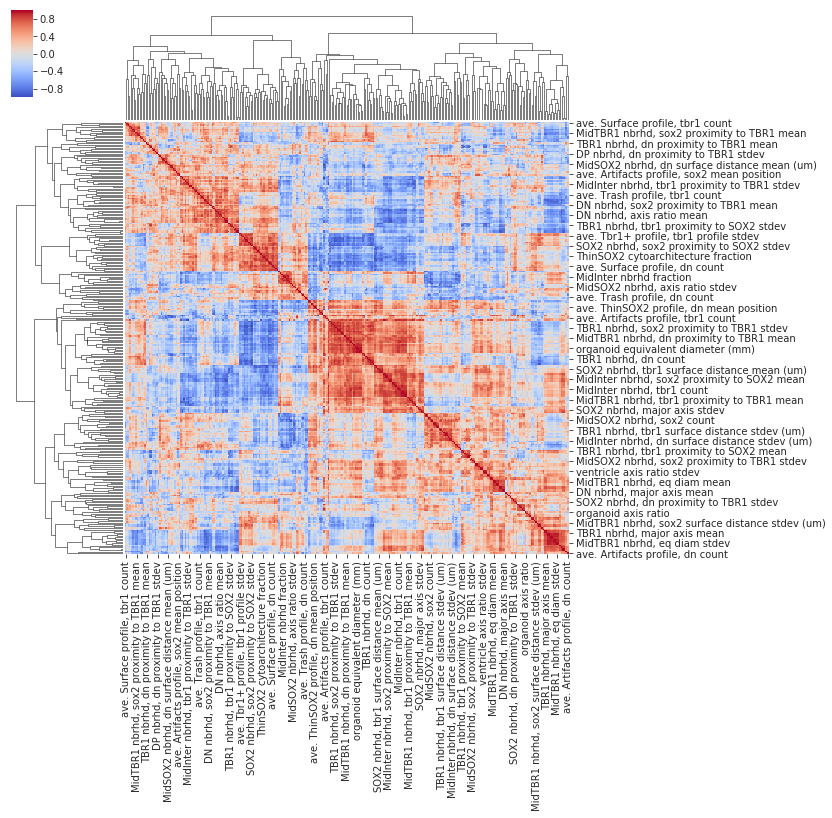

In [32]:
%matplotlib inline
cg = sns.clustermap(df_r, 
                    method='average', 
                    metric='euclidean',
                    cmap='coolwarm')
plt.show()

In [33]:
for idx in cg.dendrogram_row.reordered_ind:
    print(features[idx])

ave. Surface profile, tbr1 count
DP nbrhd, eq diam stdev
DP nbrhd, major axis stdev
ave. Artifacts2 profile, tbr1 profile stdev
ave. Artifacts2 profile, tbr1 mean position
MidInter nbrhd, dn proximity to TBR1 stdev
ave. Artifacts2 profile, sox2 count
MidTBR1 nbrhd, sox2 proximity to TBR1 mean
ave. Artifacts2 profile, dn count
ave. Artifacts2 profile, sox2 mean position
DN nbrhd, sox2 proximity to SOX2 stdev
TBR1 nbrhd, sox2 proximity to TBR1 mean
MidTBR1 nbrhd, tbr1 count
ave. DNs profile, sox2 mean position
TBR1 nbrhd, dn proximity to TBR1 mean
TBR1 nbrhd, dn proximity to TBR1 stdev
MidTBR1 nbrhd, tbr1 proximity to SOX2 stdev
MidTBR1 nbrhd, dn proximity to SOX2 stdev
DP nbrhd, dn proximity to SOX2 mean
DP nbrhd, dn proximity to SOX2 stdev
DN nbrhd, sox2 proximity to TBR1 stdev
DP nbrhd, dn proximity to TBR1 stdev
MidSOX2 nbrhd, sox2 surface distance mean (um)
MidSOX2 nbrhd, dn surface distance stdev (um)
ave. Interfering profile, sox2 mean position
MidTBR1 nbrhd, sox2 proximity to TBR

In [34]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
plt.figure(figsize=(9, 32))
ddata = dendrogram(cg.dendrogram_row.linkage,
                   color_threshold=7,
                   labels=features,
                   orientation='left',
                   leaf_font_size=12)

label_colors = {'Single-cell': 'b', 'Cytoarchitecture': 'r', 'Whole organoid': 'g'}
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    scale = df.loc[lbl.get_text()]['scale']
    lbl.set_color(label_colors[scale])
    
plt.tight_layout()
plt.show()

Negatively Correlated r < -0.99: 2
-0.991566464054111
	 ave. Artifacts profile, dn mean position
	 ave. ThinSOX2 profile, dn count
-0.991566464054111
	 ave. ThinSOX2 profile, dn count
	 ave. Artifacts profile, dn mean position
Positively Correlated r > 0.99: 22
0.9999993903322287
	 DP nbrhd, sox2 surface distance mean (um)
	 DP nbrhd, tbr1 surface distance mean (um)
0.9999993903322287
	 DP nbrhd, tbr1 surface distance mean (um)
	 DP nbrhd, sox2 surface distance mean (um)
0.9999949263530268
	 DP nbrhd, sox2 surface distance stdev (um)
	 DP nbrhd, tbr1 surface distance stdev (um)
0.9999949263530268
	 DP nbrhd, tbr1 surface distance stdev (um)
	 DP nbrhd, sox2 surface distance stdev (um)
0.999973869413585
	 DP nbrhd, tbr1 count
	 DP nbrhd, sox2 count
0.999973869413585
	 DP nbrhd, sox2 count
	 DP nbrhd, tbr1 count
0.9988928474960878
	 DP nbrhd, sox2 proximity to SOX2 mean
	 DP nbrhd, tbr1 proximity to SOX2 mean
0.9988928474960878
	 DP nbrhd, tbr1 proximity to SOX2 mean
	 DP nbrhd, sox2 pro

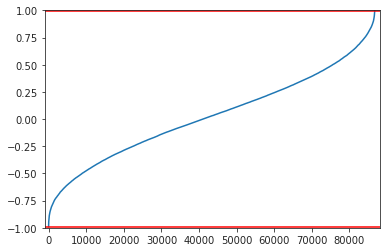

In [37]:
cutoff = 0.99

idx = np.argsort(corr)
comb_sorted = np.asarray(combinations)[idx]
corr_sorted = corr[idx]

# Remove combinations that are on the diagonal
keep_idx = np.asarray([i for i, (f1, f2) in enumerate(comb_sorted) if f1 != f2])
comb_sorted = comb_sorted[keep_idx]
corr_sorted = corr_sorted[keep_idx]

neg_idx = np.where(corr_sorted <= -cutoff)[0]
pos_idx = np.where(corr_sorted >= cutoff)[0]

neg_corr = corr_sorted[neg_idx]
neg_comb = comb_sorted[neg_idx]

pos_corr = corr_sorted[pos_idx[::-1]]
pos_comb = comb_sorted[pos_idx[::-1]]

print('Negatively Correlated r < -0.99:', len(neg_idx))
for n, c in zip(neg_corr, neg_comb):
    print(n)
    print("\t", c[0])
    print("\t", c[1])
    
print('Positively Correlated r > 0.99:', len(pos_idx))
for p, c in zip(pos_corr, pos_comb):
    print(p)
    print("\t", c[0])
    print("\t", c[1])

plt.plot(corr_sorted)
plt.plot([-1e4, len(corr) + 1e4], [cutoff, cutoff], 'r-')
plt.plot([-1e4, len(corr) + 1e4], [-cutoff, -cutoff], 'r-')
plt.ylim([-1, 1])
plt.xlim([-1e3, len(corr) + 1e3])
plt.show()

Look at correlations between features in two specific length scales

In [425]:
features1 = features[:cyto_start]
features2 = features[cyto_start:wholeorg_start]

combinations = list(product(features1, features2))
len(combinations)

6300

In [426]:
R = np.zeros((len(features1), len(features2)))
P = np.zeros((len(features1), len(features2)))
for combination in tqdm(combinations, total=len(combinations)):
    feat1 = combination[0]
    feat2 = combination[1]
    i = features1.index(feat1)
    j = features2.index(feat2)
    a = df.loc[feat1]
    b = df.loc[feat2]
    # remove nans
    keep = np.logical_and(~np.isnan(a), ~np.isnan(b))
    a = a[keep]
    b = b[keep]
    r, p = pearsonr(a, b)
    R[i, j] = r
    P[i, j] = p

In [ ]:
%matplotlib inline

df_r = pd.DataFrame(R, index=features1, columns=features2)

cg = sns.clustermap(df_r, 
                    method='average', 
                    metric='euclidean',
                    cmap='coolwarm',
                    figsize=(24, 24))
plt.tight_layout()
plt.show()

# Progenitor Distance to Surface

In [107]:
arlotta_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40/dataset'
lancaster_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Lancaster_d60/20190531_20_32_55_AA_fatty7_488LP13_561LP140_642LP50/dataset'

os.listdir(lancaster_dir)

['syto.zarr',
 'Ex0_hist.csv',
 'Ex2_hist.csv',
 'nuclei_binary.zarr',
 'nuclei_probability.zarr',
 'nuclei_fluorescence',
 'segment_ventricles.tif',
 'Ex2_rescaled',
 'nuclei_morphologies.csv',
 'syto_down6x',
 'Ex_1_Em_1_stitched',
 'organoid_features.xlsx',
 'syto_down6x.tif',
 'niche_labels.npy',
 'Ex_0_Em_0_stitched',
 'Ex1_hist.csv',
 'Ex_2_Em_2_stitched',
 'cyto_profiles.npy',
 'nuclei_foreground.zarr',
 'celltype_names.csv',
 'centroids.npy',
 'nuclei_gating.npy',
 'cyto_profiles_sample.npy',
 'sox2.zarr',
 'niche_names.csv',
 'voxel_size.csv',
 'mesh_ventricles.pkl',
 'tbr1.zarr',
 'niche_proximities.npy',
 'Ex0_rescaled',
 'segment_foreground.tif',
 'cyto_sample_index.npy',
 'Ex1_rescaled',
 'centroids_um.npy']

In [108]:
centroids_arlotta = np.load(os.path.join(arlotta_dir, 'centroids_um.npy'))
centroids_lancaster = np.load(os.path.join(lancaster_dir, 'centroids_um.npy'))

centroids_lancaster.shape

(4776884, 3)

In [109]:
labels_arlotta = np.load(os.path.join(arlotta_dir, 'niche_labels.npy'))
labels_lancaster = np.load(os.path.join(lancaster_dir, 'niche_labels.npy'))

celltypes_arlotta = np.load(os.path.join(arlotta_dir, 'nuclei_gating.npy'))
celltypes_lancaster = np.load(os.path.join(lancaster_dir, 'nuclei_gating.npy'))

labels_lancaster

array([5, 1, 6, ..., 4, 0, 4])

In [124]:
from scout.utils import read_csv

In [127]:
read_csv(os.path.join(arlotta_dir, 'celltype_names.csv')), read_csv(os.path.join(arlotta_dir, 'niche_names.csv'))

(['sox2', 'tbr1', 'dn'],
 ['DN', 'SOX2', 'TBR1', 'DP', 'MidTBR1', 'MidSOX2', 'MidInter'])

In [185]:
sox2_arlotta = centroids_arlotta[np.where(celltypes_arlotta[:, 0] == 1)[0]]
sox2_lancaster = centroids_lancaster[np.where(celltypes_lancaster[:, 0] == 1)[0]]

tbr1_arlotta = centroids_arlotta[np.where(celltypes_arlotta[:, 1] == 1)[0]]
tbr1_lancaster = centroids_lancaster[np.where(celltypes_lancaster[:, 1] == 1)[0]]

dn_arlotta = centroids_arlotta[np.where(np.logical_and(celltypes_arlotta[:, 0] == 0, celltypes_arlotta[:, 1] == 0))[0]]
dn_lancaster = centroids_lancaster[np.where(np.logical_and(celltypes_lancaster[:, 0] == 0, celltypes_lancaster[:, 1] == 0))[0]]

coredn_arlotta = centroids_arlotta[np.where(np.logical_and(np.logical_and(celltypes_arlotta[:, 0] == 0, celltypes_arlotta[:, 1] == 0), labels_arlotta == 0))[0]]
coredn_lancaster = centroids_lancaster[np.where(np.logical_and(np.logical_and(celltypes_lancaster[:, 0] == 0, celltypes_lancaster[:, 1] == 0), labels_lancaster == 0))[0]]

sox2_lancaster.shape, tbr1_lancaster.shape, dn_lancaster.shape, coredn_lancaster.shape

((754953, 3), (570830, 3), (3455177, 3), (521993, 3))

In [111]:
foreground_arlotta = io.imread(os.path.join(arlotta_dir, 'segment_foreground.tif'))
foreground_lancaster = io.imread(os.path.join(lancaster_dir, 'segment_foreground.tif'))

foreground_lancaster.shape

(900, 894, 894)

In [112]:
from scipy.ndimage.morphology import binary_erosion
from scout.utils import read_voxel_size

In [113]:
voxel_orig = read_voxel_size(os.path.join(lancaster_dir, 'voxel_size.csv'))

downsample_factor = np.asarray([1, 6, 6])
voxel_down = tuple(voxel_orig * downsample_factor)

voxel_down

(2.0, 3.906, 3.906)

In [114]:
mask_arlotta = foreground_arlotta > 0
mask_lancaster = foreground_lancaster > 0

mask_lancaster.shape

(900, 894, 894)

In [137]:
def surface_points(mask, voxel_down):
    # Find surface coordinates
    eroded = binary_erosion(mask)
    surface = np.logical_and(mask, np.logical_not(eroded))
    coords = np.asarray(np.where(surface)).T
    surface_points = coords * np.asarray(voxel_down)
    return surface_points

In [138]:
surface_arlotta = surface_points(mask_arlotta, voxel_down)
surface_lancaster = surface_points(mask_lancaster, voxel_down)

surface_lancaster.shape

(2258753, 3)

In [139]:
from sklearn.neighbors import NearestNeighbors

In [140]:
nbrs_arlotta = NearestNeighbors(n_neighbors=1).fit(surface_arlotta)
nbrs_lancaster = NearestNeighbors(n_neighbors=1).fit(surface_lancaster)

nbrs_lancaster

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1, p=2, radius=1.0)

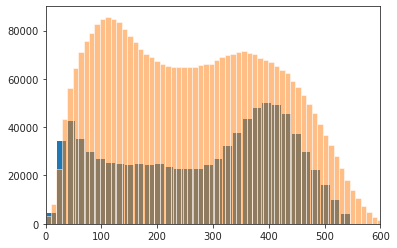

In [141]:
# DN
dn_dist_arlotta, _ = nbrs_arlotta.kneighbors(dn_arlotta)
dn_dist_lancaster, _ = nbrs_lancaster.kneighbors(dn_lancaster)

plt.hist(dn_dist_arlotta, bins=64, density=False)
plt.hist(dn_dist_lancaster, bins=64, alpha=0.5, density=False)
plt.xlim([0, 600])
plt.show()

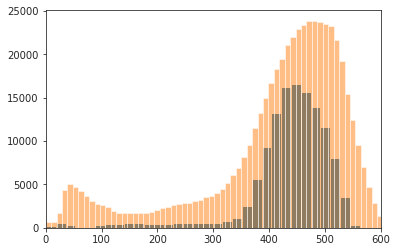

In [187]:
# CoreDN
coredn_dist_arlotta, _ = nbrs_arlotta.kneighbors(coredn_arlotta)
coredn_dist_lancaster, _ = nbrs_lancaster.kneighbors(coredn_lancaster)

plt.hist(coredn_dist_arlotta, bins=64, density=False)
plt.hist(coredn_dist_lancaster, bins=64, alpha=0.5, density=False)
plt.xlim([0, 600])
plt.show()

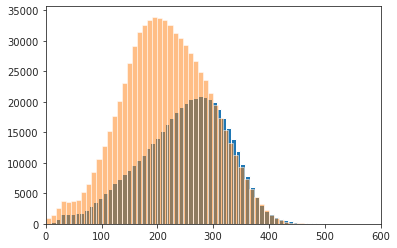

In [142]:
# SOX2
sox2_dist_arlotta, _ = nbrs_arlotta.kneighbors(sox2_arlotta)
sox2_dist_lancaster, _ = nbrs_lancaster.kneighbors(sox2_lancaster)

plt.hist(sox2_dist_arlotta, bins=64, density=False)
plt.hist(sox2_dist_lancaster, bins=64, alpha=0.5, density=False)
plt.xlim([0, 600])
plt.show()

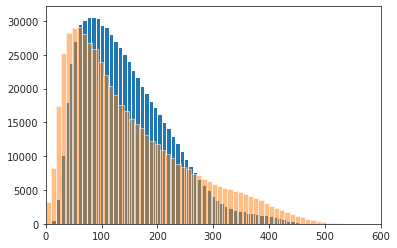

In [143]:
# TBR1
tbr1_dist_arlotta, _ = nbrs_arlotta.kneighbors(tbr1_arlotta)
tbr1_dist_lancaster, _ = nbrs_lancaster.kneighbors(tbr1_lancaster)

plt.hist(tbr1_dist_arlotta, bins=64, density=False)
plt.hist(tbr1_dist_lancaster, bins=64, alpha=0.5, density=False)
plt.xlim([0, 600])
plt.show()

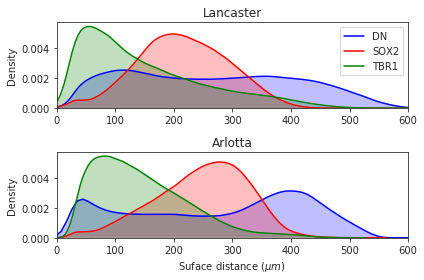

In [190]:
shade = True

plt.subplot(2, 1, 1)
sns.kdeplot(dn_dist_lancaster[:, 0], shade=shade, label='DN', color='b')
sns.kdeplot(sox2_dist_lancaster[:, 0], shade=shade, label='SOX2', color='r')
sns.kdeplot(tbr1_dist_lancaster[:, 0], shade=shade, label='TBR1', color='g')
# sns.kdeplot(coredn_dist_lancaster[:,0], shade=shade, label='CoreDN', color='k')
plt.xlim([0, 600])
plt.title('Lancaster')
plt.ylabel('Density')

plt.subplot(2, 1, 2)
sns.kdeplot(dn_dist_arlotta[:, 0], shade=shade, color='b')
sns.kdeplot(sox2_dist_arlotta[:, 0], shade=shade, color='r')
sns.kdeplot(tbr1_dist_arlotta[:, 0], shade=shade, color='g')
# sns.kdeplot(coredn_dist_arlotta[:,0], shade=shade, color='k')
plt.xlim([0, 600])
plt.title('Arlotta')
plt.xlabel('Suface distance ($\mu m$)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [273]:
dist_arlotta.std(), dist_lancaster.std()

(75.64033186393766, 80.87932315903896)

In [274]:
dist_arlotta.mean(), dist_lancaster.mean()

(248.5633904148001, 214.5127405999292)

In [192]:
sox2_arlotta.max(axis=0), surface_arlotta.max(axis=0)

(array([1556.   , 2216.655, 2157.414]), array([1644.   , 2253.762, 2222.514]))

In [258]:
mask_arlotta.sum() * np.asarray(voxel_down).prod() / 1000**3 # mm3

3.921668663032009

In [259]:
mask_lancaster.sum() * np.asarray(voxel_down).prod() / 1000**3 # mm3

7.848164009214649

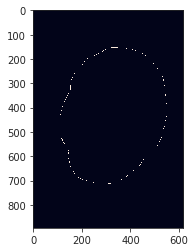

In [267]:
eroded = binary_erosion(mask_arlotta)
surface = np.logical_and(mask_arlotta, np.logical_not(eroded))

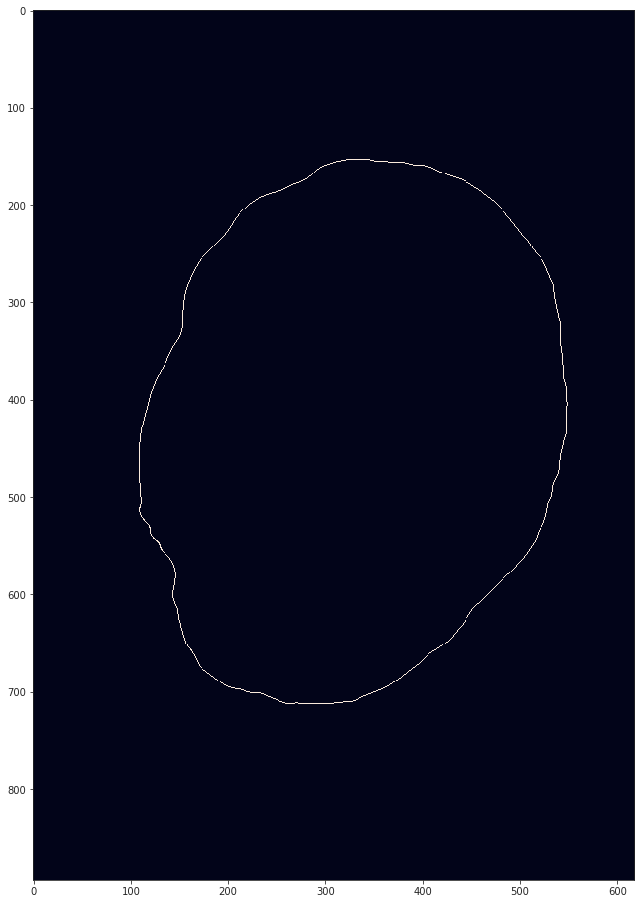

In [272]:
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(surface[300])
plt.show()

Arlotta organoids are not as large

In [328]:
df_arlotta.loc['organoid volume (mm3)'], df_ctrl.loc['organoid volume (mm3)']

(arlotta_1    3.889868
 arlotta_2    4.701122
 arlotta_3    5.153178
 arlotta_4    4.172725
 arlotta_6    3.373235
 Name: organoid volume (mm3), dtype: float64, d60_1     7.104010
 d60_2     4.295311
 d60_3     8.601389
 d60_4    12.706417
 d60_5     7.763225
 Name: organoid volume (mm3), dtype: float64)

Lancaster organoids have more SOX2, TBR1, and DN cells

In [337]:
df_arlotta.head(50)

print(df_arlotta.loc['DN nbrhd, dn count'], df_ctrl.loc['DN nbrhd, dn count'])
print(df_arlotta.loc['SOX2 nbrhd, sox2 count'], df_ctrl.loc['SOX2 nbrhd, sox2 count'])
print(df_arlotta.loc['TBR1 nbrhd, tbr1 count'], df_ctrl.loc['TBR1 nbrhd, tbr1 count'])
print(df_arlotta.loc['MidTBR1 nbrhd, dn count'], df_ctrl.loc['MidTBR1 nbrhd, dn count'])

arlotta_1    280996.0
arlotta_2    205810.0
arlotta_3    340502.0
arlotta_4    174895.0
arlotta_6    162513.0
Name: DN nbrhd, dn count, dtype: float64 d60_1    1945852.0
d60_2     490586.0
d60_3     823421.0
d60_4    2367183.0
d60_5     837813.0
Name: DN nbrhd, dn count, dtype: float64
arlotta_1    442969.0
arlotta_2    869117.0
arlotta_3    838925.0
arlotta_4    585863.0
arlotta_6    552654.0
Name: SOX2 nbrhd, sox2 count, dtype: float64 d60_1    1514855.0
d60_2     462003.0
d60_3     901847.0
d60_4    2165047.0
d60_5    1269695.0
Name: SOX2 nbrhd, sox2 count, dtype: float64
arlotta_1     921442.0
arlotta_2     953563.0
arlotta_3    1113894.0
arlotta_4    1045120.0
arlotta_6     694180.0
Name: TBR1 nbrhd, tbr1 count, dtype: float64 d60_1    1624941.0
d60_2     450699.0
d60_3    1321265.0
d60_4    1862458.0
d60_5    1054070.0
Name: TBR1 nbrhd, tbr1 count, dtype: float64
arlotta_1    157429.0
arlotta_2    127811.0
arlotta_3    170545.0
arlotta_4    141105.0
arlotta_6    117462.0
Name: Mi

In [336]:
df.iloc[21:28]

,d60_1,d60_2,d60_3,d60_4,d60_5,arlotta_1,arlotta_2,arlotta_3,arlotta_4,arlotta_6
feature,,,,,,,,,,
DN nbrhd fraction,0.220760,0.175484,0.154745,0.234960,0.145060,0.136387,0.081338,0.122153,0.079521,0.090697
SOX2 nbrhd fraction,0.172086,0.165430,0.169686,0.215279,0.220074,0.215136,0.343570,0.301071,0.266442,0.308575
TBR1 nbrhd fraction,0.185906,0.162425,0.249988,0.186574,0.184152,0.447442,0.377082,0.399819,0.475395,0.387643
DP nbrhd fraction,0.002119,0.002010,0.002694,0.004578,0.003258,0.003673,0.014137,0.007799,0.005971,0.008037
MidTBR1 nbrhd fraction,0.269218,0.310854,0.253653,0.198917,0.287009,0.079976,0.053283,0.064438,0.067206,0.069152
MidSOX2 nbrhd fraction,0.053635,0.076577,0.045185,0.074470,0.051758,0.044317,0.056823,0.043407,0.032569,0.045960
MidInter nbrhd fraction,0.096275,0.107221,0.124048,0.085222,0.108689,0.073068,0.073767,0.061313,0.072896,0.089936


Largest DN differences are fewer MidTBR1-DN and fewer Core-DN

247